In [5]:
import pandas as pd
import numpy as np
import plotnine as p9
import plotnine.options as p9options

In [6]:
root_results_dir = "/projects/genomic-ml/da2343/ml_project_1/algo_comparison/results"

In [7]:



error_df1 = pd.read_csv(f"{root_results_dir}/2023-03-22_18:12_results.csv")
error_df2 = pd.read_csv(f"{root_results_dir}/2023-03-22_19:01_results.csv")
error_df = pd.concat([error_df1, error_df2], ignore_index=True)
# change where algorithm is GuassianGraphicalMethod to GaussianGraphicalModel
error_df.loc[error_df['Algorithm'] == 'GuassianGraphicalMethod', 'Algorithm'] = 'GaussianGraphicalModel'


colors = [ "orange", "red", "blue", "#053061", "#67001f"]

dataset_list = error_df["Dataset"].unique().tolist()
main_test_error_list = []
for dataset in dataset_list:
    test_error_df_list = []
    sub_dataset_df = error_df[error_df["Dataset"] == dataset]
    n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()
    
    for n_sample in n_samples_list:
        filtered_csv = sub_dataset_df[sub_dataset_df["# of Total Samples"] == n_sample]
        algo_list = filtered_csv["Algorithm"].unique().tolist()
        
        for algorithm in algo_list:
            sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
            mean_mse = sub_filtered_csv['Mean Squared Error'].mean()
            std_mse = sub_filtered_csv['Mean Squared Error'].var() * 0.3
            mse_min = mean_mse - std_mse
            mse_max = mean_mse + std_mse
            
            test_error_dict = {'# of Total Samples': n_sample,
                            'Mean Squared Error': mean_mse,
                            # 'R2 Score': mean_r2,
                            'ymin' : mse_min,
                            'ymax' : mse_max,
                            'Dataset': dataset,
                            'Algorithm': algorithm,
                            }
            test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    # save the dataframe
    # remove the index column
    my_combined_results_df = my_combined_results_df.drop(columns=['index'])
    main_test_error_list.append(my_combined_results_df)
    
# combine all the dataframes
combined_results_df = pd.concat(main_test_error_list).reset_index()

# define the order of the facets
dataset_order = ['amgut1', 'crohns', 'ioral']
p9options.figure_size = (5.8, 3)
colors = ["orange", "red", "blue", "#053061", "#67001f"]

# Reorder the levels of the Dataset variable
combined_results_df['Dataset'] = pd.Categorical(combined_results_df['Dataset'], categories=dataset_order, ordered=True)
max_train_samples = combined_results_df.groupby('Dataset')['# of Total Samples'].max()
"""
gg = p9.ggplot(combined_results_df) +\
p9.aes(x='# of Total Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
p9.facet_wrap('~Dataset', scales='free_x') +\
p9.geom_line( p9.aes(color = "Algorithm") ) +\
p9.geom_ribbon(alpha = 0.27) +\
p9.scale_fill_manual(values=colors) +\
p9.scale_color_manual(values=colors) +\
p9.xlab("Number of Total Samples") +\
p9.ylab("Mean Squared Error (MSE)") +\
p9.theme(legend_position="bottom", legend_box_spacing=0.3)+\
p9.guides(fill=p9.guide_legend(ncol = 2)) 
# show the plot
print(gg)
"""

'\ngg = p9.ggplot(combined_results_df) +p9.aes(x=\'# of Total Samples\', y=\'Mean Squared Error\', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +p9.facet_wrap(\'~Dataset\', scales=\'free_x\') +p9.geom_line( p9.aes(color = "Algorithm") ) +p9.geom_ribbon(alpha = 0.27) +p9.scale_fill_manual(values=colors) +p9.scale_color_manual(values=colors) +p9.xlab("Number of Total Samples") +p9.ylab("Mean Squared Error (MSE)") +p9.theme(legend_position="bottom", legend_box_spacing=0.3)+p9.guides(fill=p9.guide_legend(ncol = 2)) \n# show the plot\nprint(gg)\n'

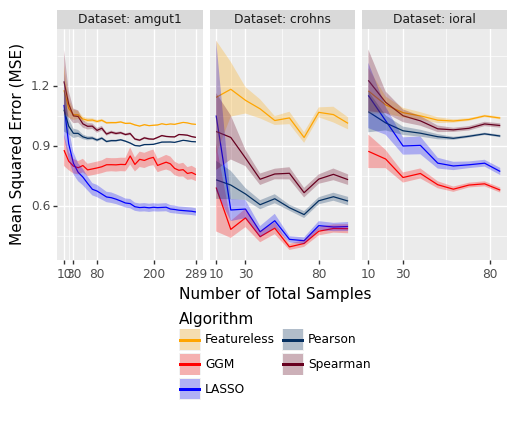

In [8]:
import plotnine as p9
import pandas as pd
import plotnine.options as p9options

error_df1 = pd.read_csv(f"{root_results_dir}/2023-04-10_15:31_results.csv")
error_df2 = pd.read_csv(f"{root_results_dir}/2023-04-10_17:47_results.csv")
error_df = pd.concat([error_df1, error_df2], ignore_index=True)
# change where algorithm is GuassianGraphicalMethod to GaussianGraphicalModel
error_df.loc[error_df['Algorithm'] == 'GaussianGraphicalModel', 'Algorithm'] = 'GGM'
error_df.loc[error_df['Algorithm'] == 'LassoCV', 'Algorithm'] = 'LASSO'
error_df.loc[error_df['Algorithm'] == 'Pearson Correlation', 'Algorithm'] = 'Pearson'
error_df.loc[error_df['Algorithm'] == 'Spearman Rank', 'Algorithm'] = 'Spearman'

colors = [ "orange", "red", "blue", "#053061", "#67001f"]

dataset_list = error_df["Dataset"].unique().tolist()
main_test_error_list = []
for dataset in dataset_list:
    test_error_df_list = []
    sub_dataset_df = error_df[error_df["Dataset"] == dataset]
    n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()
    
    for n_sample in n_samples_list:
        filtered_csv = sub_dataset_df[sub_dataset_df["# of Total Samples"] == n_sample]
        algo_list = filtered_csv["Algorithm"].unique().tolist()
        
        for algorithm in algo_list:
            sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
            mean_mse = sub_filtered_csv['Mean Squared Error'].mean()
            std_mse = sub_filtered_csv['Mean Squared Error'].var() * 0.25
            mse_min = mean_mse - std_mse
            mse_max = mean_mse + std_mse
            
            test_error_dict = {'# of Total Samples': n_sample,
                            'Mean Squared Error': mean_mse,
                            # 'R2 Score': mean_r2,
                            'ymin' : mse_min,
                            'ymax' : mse_max,
                            'Dataset': dataset,
                            'Algorithm': algorithm,
                            }
            test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    # save the dataframe
    # remove the index column
    my_combined_results_df = my_combined_results_df.drop(columns=['index'])
    main_test_error_list.append(my_combined_results_df)
    
# combine all the dataframes
combined_results_df = pd.concat(main_test_error_list).reset_index()
# combined_results_df = combined_results_df[combined_results_df['# of Total Samples'] <= 90]

# define the order of the facets
dataset_order = ['amgut1', 'crohns', 'ioral']
# p9options.figure_size = (7, 3)
# p9options.figure_size = (9, 3)

# Reorder the levels of the Dataset variable
combined_results_df['Dataset'] = pd.Categorical(combined_results_df['Dataset'], categories=dataset_order, ordered=True)

# save combined_results_df
# combined_results_df.to_csv(f"{root_results_dir}/combined_results_df.csv", index=False)

max_train_samples = combined_results_df.groupby('Dataset')['# of Total Samples'].max()

gg = p9.ggplot(combined_results_df) +\
p9.aes(x='# of Total Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
p9.facet_wrap('~Dataset',  labeller= 'label_both',scales='free_x' ) +\
p9.geom_line( p9.aes(color = "Algorithm") ) +\
p9.geom_ribbon(alpha = 0.27) +\
p9.scale_fill_manual(values=colors) +\
p9.scale_color_manual(values=colors) +\
p9.xlab("Number of Total Samples") +\
p9.ylab("Mean Squared Error (MSE)") +\
p9.theme(legend_position="bottom", legend_box_spacing=0.3)+\
p9.guides(fill=p9.guide_legend(ncol = 2))+\
p9.scale_x_continuous(breaks=[10, 30, 80, 200, 289])
# show the plot
print(gg)
# save the plot as svg
# p9.ggsave(gg, filename=f"2023-04-10_17:47_results.png", dpi=700)


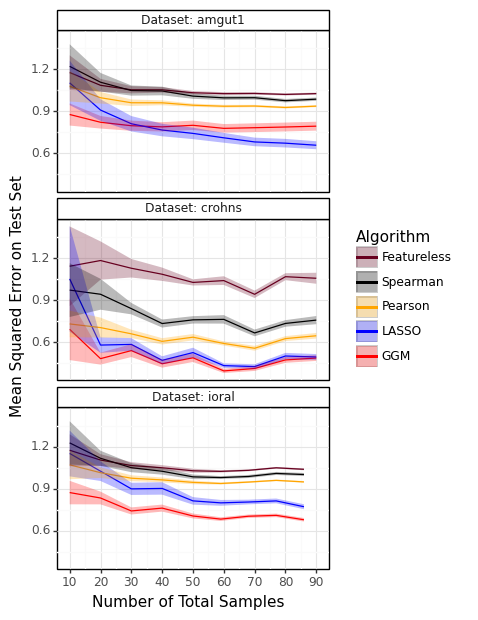

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3.5 x 7 in image.
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: 2023-04-10_17:47_results.png


In [11]:
colors = ["#67001f", "#010101","orange", "blue", "red" ]
# Blue (#0072B2)
# Orange (#E69F00)
# Green (#009E73)
# Purple (#CC79A7)
# Yellow (#F0E442)
# colors = ["orange", "purple", "yellow", "blue", "green"]
# combined_results_df = combined_results_df[luecombined_results_df['# of Total Samples'] <= 90]
p9options.figure_size = (3.5, 7)
# p9options.figure_size = (4, 7)
#multiply ymin and ymax by 0.5
new_combined_results_df = combined_results_df.copy()
new_combined_results_df = new_combined_results_df[new_combined_results_df['# of Total Samples'] <= 90]

gg = p9.ggplot(new_combined_results_df) +\
p9.aes(x='# of Total Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
p9.facet_wrap('Dataset',  labeller= 'label_both', nrow = 3) +\
p9.geom_line( p9.aes(color = "Algorithm") ) +\
p9.geom_ribbon(alpha = 0.27) +\
p9.scale_fill_manual(breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors) +\
p9.scale_color_manual(breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors) +\
p9.theme(
            axis_text=p9.element_text(size=0.8*11),
            legend_key=p9.element_rect(color='#CCCCCC'),
            panel_background=p9.element_rect(fill='white'),
            panel_border=p9.element_rect(fill='None', color='black'),
            panel_grid_major=p9.element_line(color='#E5E5E5', size=0.8),
            panel_grid_minor=p9.element_line(color='#FAFAFA', size=1),
            strip_background=p9.element_rect(
                fill='white',
                color='black',
                size=1
            )
) +\
p9.scale_x_continuous(breaks=[10, 20, 30, 40,50,60,70, 80, 90])+\
p9.xlab("Number of Total Samples") +\
p9.ylab("Mean Squared Error on Test Set")
   
# show the plot
print(gg)
# save the plot as svg
p9.ggsave(gg, filename=f"2023-04-10_17:47_results.png", dpi=900)

In [ ]:
import pandas as pd
from plotnine import *
import plotnine.options as p9options

p9options.figure_size = (10, 2)


amgut1_crohns_ioral_edges_sample_df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/model_edges_comp/source_target/amgut1_crohns_ioral_edges_sample_df_1.csv")
# create the plot
p = (ggplot(amgut1_crohns_ioral_edges_sample_df, 
       aes(x = 'n_total_samples', 
           y = 'mean_n_edges', 
           ymin = 'mean_n_edges - 0.03*median_n_edges', 
           ymax = 'mean_n_edges + 0.03*median_n_edges', 
           fill = 'algorithm'
           )) +
  # add color inside here
  geom_line(aes(color= 'algorithm')) +
  geom_ribbon(alpha = 0.3) +
  facet_wrap('~ Dataset', labeller = 'label_both', scales = "free" ) +
  labs(x = "n_total_samples",
       y = "mean_n_edges",
       color = "algorithm") +
  xlab("Number of Total Samples") +
  ylab("Mean Number of Edges") +
  scale_fill_manual(values = [ "red", "blue", "#053061", "#67001b"], name = "Algorithm" ) +
  scale_color_manual(values = [ "red", "blue", "#053061", "#67001b"], name = "Algorithm" ) +
  theme(
            axis_text=element_text(size=0.8*11),
            legend_key=element_rect(color='#CCCCCC'),
            panel_background=element_rect(fill='white'),
            panel_border=element_rect(fill='None', color='black'),
            panel_grid_major=element_line(color='#E5E5E5', size=0.8),
            panel_grid_minor=element_line(color='#FAFAFA', size=1),
            strip_background=element_rect(
                fill='white',
                color='black',
                size=1
            ),
            subplots_adjust={'wspace': 0.2}
)
)

# print the plot
print(p)

# save the plot as svg
p9.ggsave(p, filename=f"amgut1_crohns_ioral_edges_sample.svg")
